<a href="https://colab.research.google.com/github/MdShakil-Hossain/CSE438-Image-Processing-Labs/blob/main/CSE_438_DIP_Lab_1_Image_Pre%E2%80%91processing_and_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Image Pre‑processing & Enhancement using OpenCV & NumPy

- Objectives: Learn basic DIP techniques to prepare images for downstream tasks.

- Topics: Grayscale conversion, histogram equalization, smoothing & sharpening filters

- Tools: OpenCV, NumPy

## Install and Import Required Libraries

In [ ]:
# RUN ONLY if you need the very latest versions
!pip install -q --upgrade opencv-python-headless scikit-image pillow


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!  pip install -q matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Install OpenCV if not available (Colab usually has it)
#!pip install opencv-python-headless

import cv2
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow  # display OpenCV images

plt.rcParams["figure.figsize"] = (6,4)

# Load and Display an Image


In [ ]:
# --- Option A: Upload from local drive ---
#from google.colab import files
#uploaded = files.upload()        # pick a file in the dialog
#fname = list(uploaded.keys())[0]

# --- Option B: Read from URL ---
url = "https://github.com/mohammadimtiazz/standard-test-images-for-Image-Processing/blob/master/standard_test_images/peppers.png?raw=true"
url_img = io.imread(url)         # scikit-image reads directly from http(s)


# --- Option C: Mount Google Drive ---
# from google.colab import drive
# drive.mount('/content/drive')
# fname = '/content/drive/MyDrive/path/to/your_image.jpg'

# Read with OpenCV (BGR)
#img_bgr = cv2.imread(fname)             # for Option A or C
# Read with Pillow (RGB)
#img_pil = Image.open(fname)
# Read with scikit-image (RGB float32 0-1)
#img_ski = io.imread(fname)

#print("OpenCV shape:", img_bgr.shape)
#cv2_imshow(img_bgr)


## Load and Display an Image in Color and Grayscale

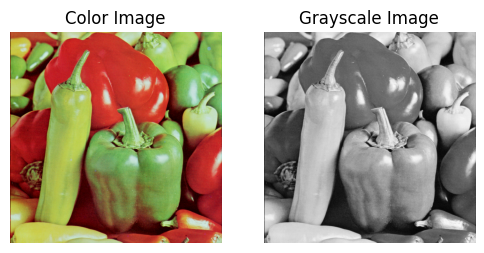

In [ ]:
# Upload image
#from google.colab import files
#uploaded = files.upload()

# Read the image (replace 'your_image.jpg' with actual filename after upload)
#img_color = cv2.imread(list(uploaded.keys())[0])  # Read as BGR
url = "https://github.com/mohammadimtiazz/standard-test-images-for-Image-Processing/blob/master/standard_test_images/peppers.png?raw=true"
# Use skikit-image to read the image from the URL, which returns a NumPy array
img_color_rgb = io.imread(url)

# Convert the RGB image (from skimage) to BGR for OpenCV compatibility
img_color_bgr = cv2.cvtColor(img_color_rgb, cv2.COLOR_RGB2BGR)

# Now, use the BGR image for further processing with OpenCV functions
# For displaying with matplotlib, convert it back to RGB
img_color_display = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

# Convert the BGR image to grayscale using OpenCV
img_gray = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2GRAY)

# Display
plt.subplot(1, 2, 1)
# Use the RGB version for displaying with matplotlib
plt.imshow(img_color_display)
plt.title("Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Basic arithmetic operations (add, subtract, multiply, divide, weighted blend)

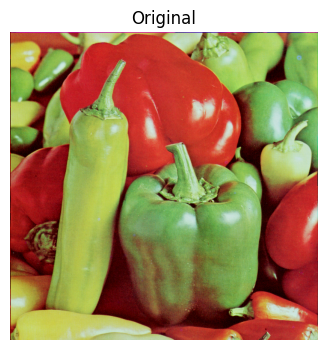

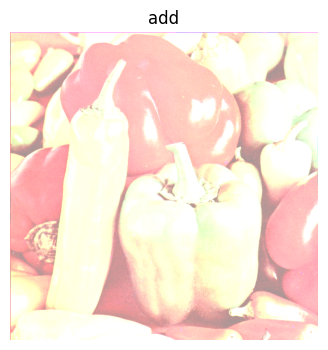

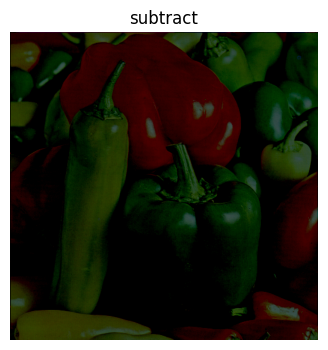

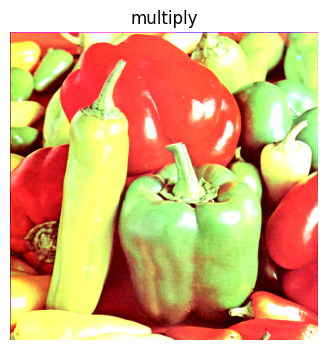

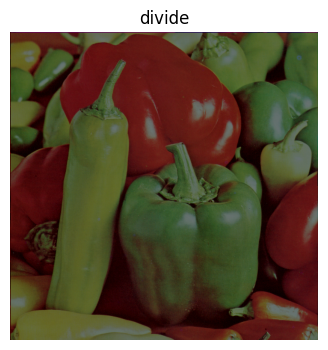

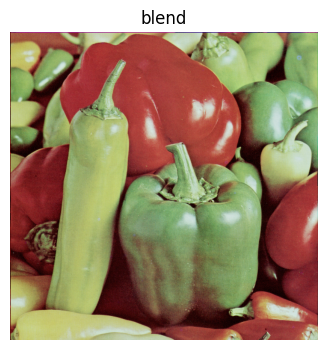

In [ ]:
# Convert all images to the same NumPy (uint8, BGR) format for consistency
img = img_color_bgr.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # 3-channel gray

# Addition (saturates at 255)
add_img = cv2.add(img, 150)                        # brighten
# Subtraction
sub_img = cv2.subtract(img, 150)                   # darken
# Multiplication (scale)
mul_img = cv2.multiply(img, 1.5)                  # contrast ↑
# Division
div_img = cv2.divide(img, 2)                      # contrast ↓
# Weighted blend (alpha-beta-gamma)
blend = cv2.addWeighted(img, 0.7, gray_bgr, 0.3, 0)

titles = ["Original", "add", "subtract", "multiply", "divide", "blend"]
images = [img, add_img, sub_img, mul_img, div_img, blend]

for t, im in zip(titles, images):
    plt.figure(); plt.title(t); plt.axis('off')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


# Logical / bitwise operations (AND, OR, XOR, NOT)

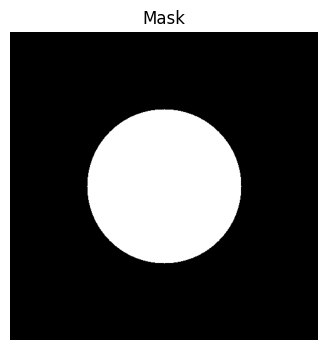

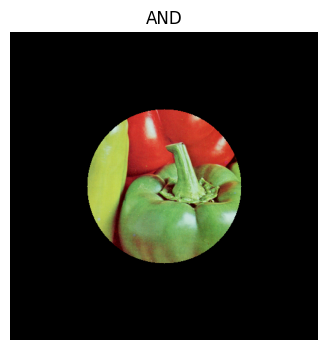

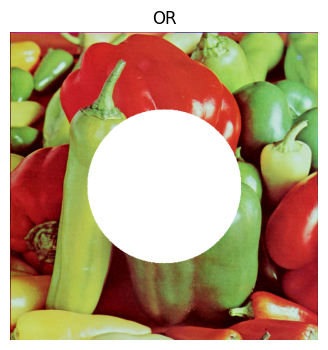

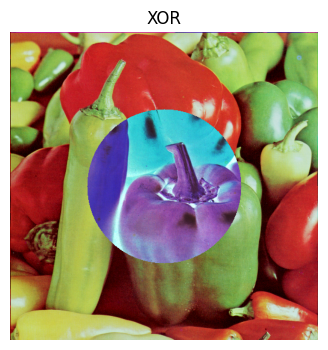

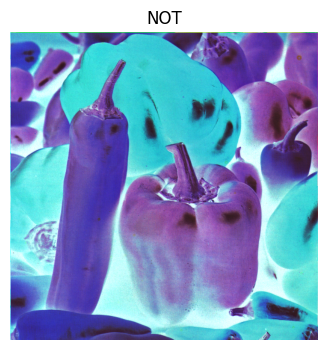

In [ ]:
# Create a synthetic mask for demonstration
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.circle(mask, center=(img.shape[1]//2, img.shape[0]//2),
           radius=min(img.shape[:2])//4, color=255, thickness=-1)

# Bitwise AND: keep only circle
and_img = cv2.bitwise_and(img, img, mask=mask)
# Bitwise OR: overlay gray circle
circle_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
or_img = cv2.bitwise_or(img, circle_rgb)
# Bitwise XOR: highlight difference
xor_img = cv2.bitwise_xor(img, circle_rgb)
# Bitwise NOT (invert colors)
not_img = cv2.bitwise_not(img)

bit_titles = ["Mask", "AND", "OR", "XOR", "NOT"]
bit_images = [circle_rgb, and_img, or_img, xor_img, not_img]

for t, im in zip(bit_titles, bit_images):
    plt.figure(); plt.title(t); plt.axis('off')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


# Saving images in Colab (multiple ways)

In [ ]:
# --- OpenCV ---
cv2.imwrite("result_add.jpg", add_img)

# --- Pillow ---
out_pil = Image.fromarray(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))
out_pil.save("result_sub.png")

# --- scikit-image ---
#io.imsave("result_xor.tif", cv2.cvtColor(xor_img, cv2.COLOR_BGR2RGB))

#print("Saved three files in the current working directory.")



In [ ]:
!ls -lh *.jpg *.png *.tif


'ls' is not recognized as an internal or external command,
operable program or batch file.



 # **What is an Image Histogram?**

* An **image histogram** is a graph showing the **frequency distribution of pixel intensity values** in a grayscale image.
* X-axis: **Pixel intensity** (0 to 255).
* Y-axis: **Number of pixels** that have that intensity.
* It provides insight into the **contrast and brightness** of the image.

---

**Original Histogram**

* In natural or low-contrast images, pixel intensities are often **clustered in a narrow range** (e.g., all midtones).
* This leads to a “compressed” histogram and low visual contrast.

---

 **After Histogram Equalization**

* Histogram equalization **redistributes pixel intensities** across the full range (0–255).
* This **stretches** the histogram, improving the contrast.
* The new histogram is more **uniformly spread**, enabling better visibility of fine details.


**Why Compare Histograms?**

* Before and after histograms give a **quantitative view of contrast improvement**.
* It helps in **justifying** preprocessing decisions for downstream tasks like:

  * Object detection
  * Medical image analysis
  * OCR (optical character recognition)




## Apply Histogram Equalization

**What is Histogram Equalization?**

* It's a contrast enhancement technique that **redistributes pixel intensities** in an image.
* The goal is to **stretch out** the intensity range so that all values (0–255) are used more uniformly.
* This is especially useful when:

  * Images appear **washed out** or **too dark**
  * Details in low-contrast areas are hard to distinguish

---

**How It Works (Simplified Explanation)**

1. Compute the **histogram** of the image: counts of pixel intensities (0 to 255).
2. Calculate the **cumulative distribution function (CDF)** of this histogram.
3. Normalize the CDF so that it spans the entire range \[0, 255].
4. Map each original pixel value to a new value based on the CDF.

This process **remaps** intensities to use the full range more evenly.

---

**Effect on Images**

* **Before Equalization**: Intensities may be clustered, making the image look flat.
* **After Equalization**: Intensities are spread out, making details more visible.

Example: A foggy image or an underexposed medical scan becomes clearer.

---

**Limitations**

* Equalization can **introduce noise or artifacts** in some cases.
* May not be suitable for **images with already balanced contrast**.
* For **color images**, applying it directly on R, G, B channels **distorts color**. Instead, use YUV or HSV and apply it on the luminance/value channel.






- Histogram equalization enhances the contrast of grayscale images by spreading out the most frequent intensity values.

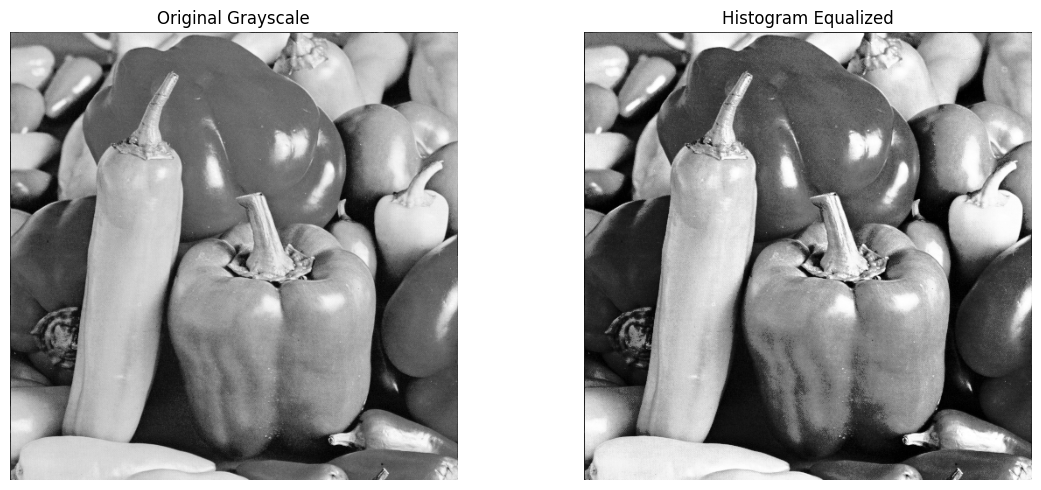

In [ ]:
# Apply histogram equalization to the grayscale image
equalized_img = cv2.equalizeHist(img_gray)

# Display original vs equalized image side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')

plt.tight_layout()
plt.show()


## Plot Histogram Before and After Equalization

- Plot histograms for original and equalized grayscale images

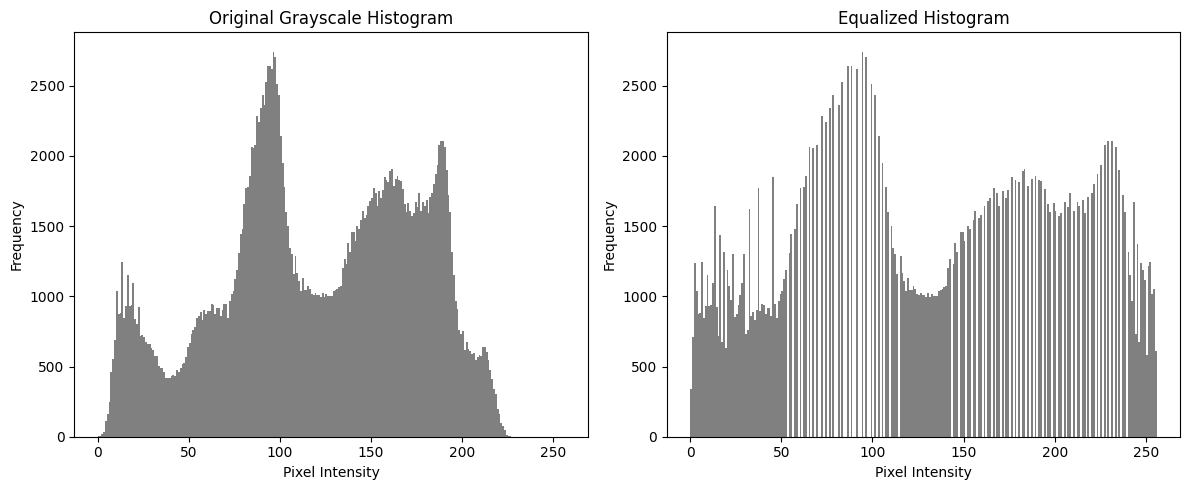

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram of the original grayscale image
plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Original Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram of the equalized grayscale image
plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Compute and plot cumulative histogram (CDF)

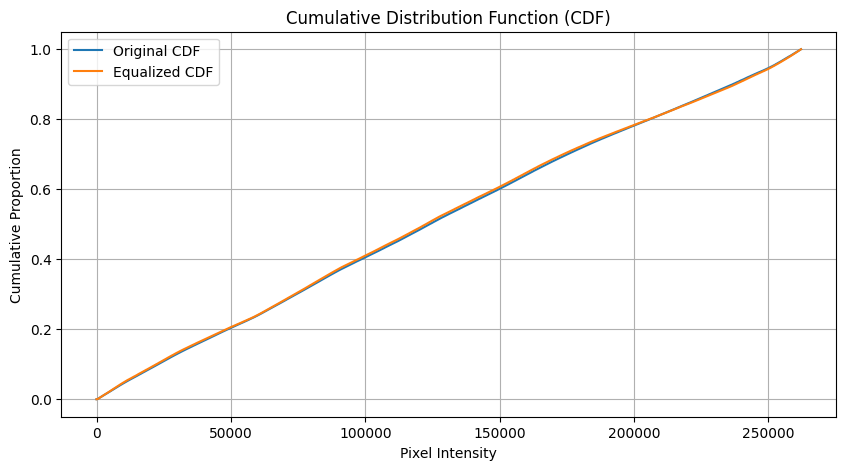

In [ ]:

cdf = img_gray.ravel().cumsum()
cdf_equalized = equalized_img.ravel().cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cdf / cdf[-1], label='Original CDF')
plt.plot(cdf_equalized / cdf_equalized[-1], label='Equalized CDF')
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Proportion")
plt.legend()
plt.grid(True)
plt.show()


### Split the color image into its RGB components

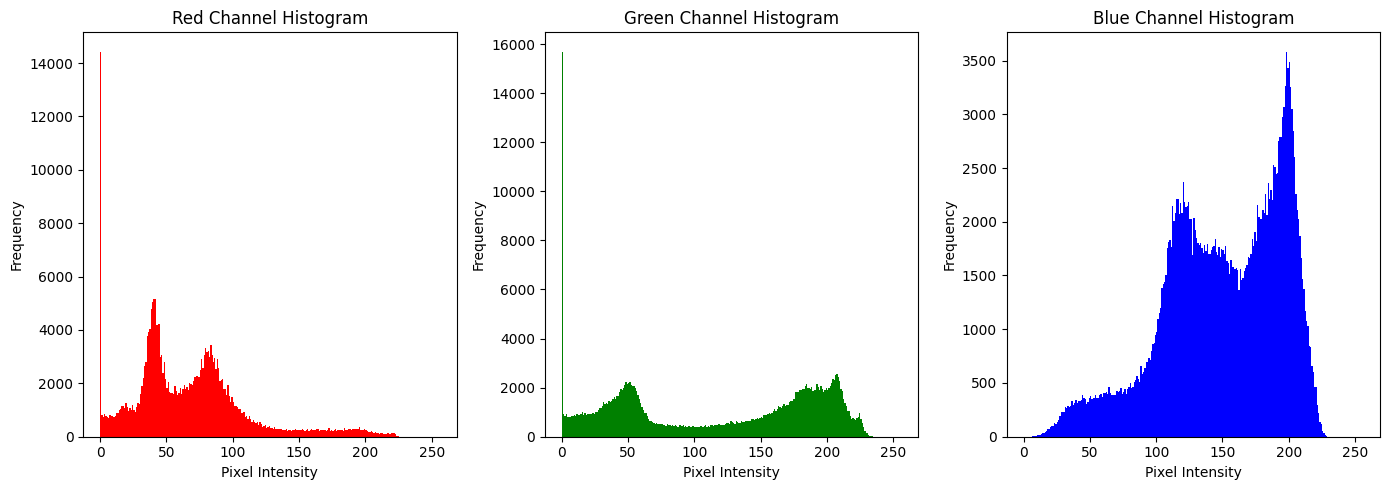

In [ ]:

r_channel = img_color_bgr[:, :, 0]
g_channel = img_color_bgr[:, :, 1]
b_channel = img_color_bgr[:, :, 2]

# Plot histograms of each channel
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(r_channel.ravel(), bins=256, range=[0, 256], color='red')
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(g_channel.ravel(), bins=256, range=[0, 256], color='green')
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(b_channel.ravel(), bins=256, range=[0, 256], color='blue')
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Apply Gaussian Blur for Smoothing

- What is Gaussian Blur? Gaussian blur is a low-pass filter that smooths the image by averaging pixel values with their neighbors.

- It is widely used to remove noise, reduce detail, or prepare images for edge detection (e.g., Canny).

- Gaussian Blur is a smoothing technique that reduces image noise and detail.
- It uses a Gaussian kernel to perform convolution on the image.



```
cv2.GaussianBlur(src, ksize, sigmaX)

```



| Parameter             | Meaning                                                      |
| --------------------- | ------------------------------------------------------------ |
| `src`                 | Source image (in this case, `img_gray`)                      |
| `ksize`               | Kernel size, e.g., `(5, 5)` → 5×5 Gaussian filter window     |
| `sigmaX`              | Standard deviation in X direction (horizontal blur strength) |
| `sigmaY` *(optional)* | If not provided, it's set equal to `sigmaX`                  |
| `dst` *(output)*      | Blurred image output (assigned to `blurred_img` here)        |


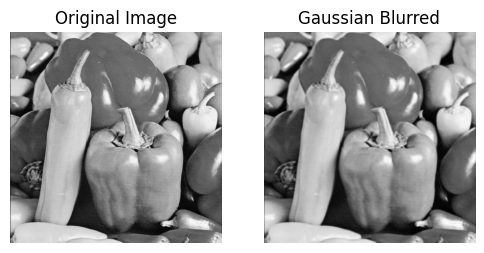

In [ ]:
# Apply Gaussian blur
blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Display original and blurred
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis('off')
plt.show()


📘 **Function Overview**

```python
cv2.GaussianBlur(src, ksize, sigmaX)
```

| Parameter             | Meaning                                                      |
| --------------------- | ------------------------------------------------------------ |
| `src`                 | Source image (in this case, `img_gray`)                      |
| `ksize`               | Kernel size, e.g., `(5, 5)` → 5×5 Gaussian filter window     |
| `sigmaX`              | Standard deviation in X direction (horizontal blur strength) |
| `sigmaY` *(optional)* | If not provided, it's set equal to `sigmaX`                  |
| `dst` *(output)*      | Blurred image output (assigned to `blurred_img` here)        |

---

🔍 **Parameter Explanation**

 🔹 `ksize` – Kernel Size

* Tuple format: `(width, height)`, e.g., `(3, 3)`, `(5, 5)`, etc.
* **Must be odd numbers**.
* Larger values increase blurring.

 🔹 `sigmaX` – Standard Deviation in X Direction

* Controls the amount of blur.
* If set to `0`, OpenCV calculates it automatically from kernel size.

🔹 Optional `sigmaY`

* Standard deviation in Y direction.
* If omitted, it defaults to `sigmaX` (i.e., isotropic blur).

---

 💡 **Real-World Applications**

* **Preprocessing for edge detection** (to suppress noise)
* **Image smoothing** before compression
* **Denoising** medical or satellite images

---




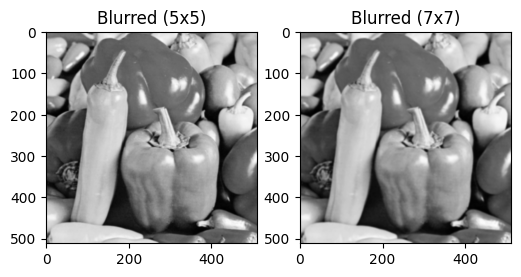

In [ ]:
# Stronger blur by increasing kernel size
blurred_7x7 = cv2.GaussianBlur(img_gray, (7, 7), 0)

plt.subplot(1, 2, 1)
plt.imshow(blurred_img, cmap='gray')
plt.title("Blurred (5x5)")

plt.subplot(1, 2, 2)
plt.imshow(blurred_7x7, cmap='gray')
plt.title("Blurred (7x7)")
plt.show()


## Apply Laplacian Sharpening

- Laplacian sharpening is a high-pass filtering technique used to enhance edges.
- It highlights regions with rapid intensity change (i.e., edges).
- We then add this "edge mask" back to the original image to produce a sharpened version.

The function call:

```python
cv2.addWeighted(img_gray, 1.0, laplacian, 1.0, 0)
```

This function performs a **weighted sum** of two images, with an optional scalar bias added.

---

### 📘 **Syntax**

```python
cv2.addWeighted(src1, alpha, src2, beta, gamma)
```

### 📌 **Parameter Breakdown**

| Parameter | Description                                                                                          |
| --------- | ---------------------------------------------------------------------------------------------------- |
| `src1`    | First input image (in this case, `img_gray`, the original grayscale image)                           |
| `alpha`   | Weight for the first image (`img_gray`). Controls its contribution in the final result.              |
| `src2`    | Second input image (in this case, `laplacian`, the edge-enhancement map)                             |
| `beta`    | Weight for the second image (`laplacian`). Controls its intensity contribution.                      |
| `gamma`   | Scalar added to the sum. Useful for brightness offset. Set to `0` to keep the pixel range unchanged. |

---

### 🧮 **What it does mathematically**

It computes the following for each pixel:

$$
\text{Output}(x, y) = \alpha \cdot \text{img_gray}(x, y) + \beta \cdot \text{laplacian}(x, y) + \gamma
$$

With:

* `alpha = 1.0`
* `beta = 1.0`
* `gamma = 0`

So it simplifies to:

$$
\text{Output}(x, y) = \text{img_gray}(x, y) + \text{laplacian}(x, y)
$$

This effectively **sharpens** the image by **adding edge details (from Laplacian) to the original grayscale** image.

---

### 📌 Tip for Experimentation:

You can adjust `alpha` and `beta` to:

* Make sharpening more subtle (e.g., `1.0` and `0.5`)
* Amplify sharpening (e.g., `1.0` and `1.5`)
* Add brightness by increasing `gamma` slightly (e.g., `gamma = 10`)


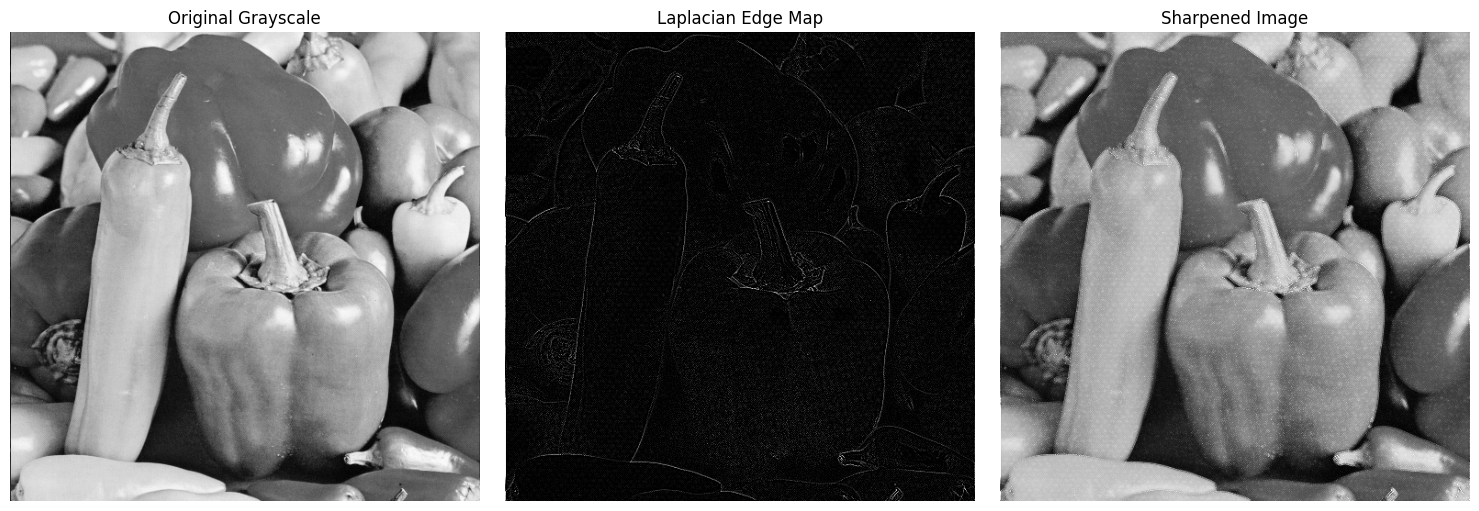

In [ ]:
# Step 1: Apply Laplacian filter
laplacian = cv2.Laplacian(img_gray, ddepth=cv2.CV_64F)  # use higher precision to preserve negative values
laplacian = np.uint8(np.clip(laplacian, 0, 255))         # clip and convert to 8-bit for visualization

# Step 2: Combine the original grayscale with the Laplacian edges to enhance the image
sharpened_img = cv2.addWeighted(img_gray, 1.0, laplacian, 1.0, 0)

# Show all images side-by-side for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Map")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_img, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()


## Measure PSNR between Original and Processed Images

- PSNR (Peak Signal-to-Noise Ratio) helps us quantify the quality of processed images.
- Higher PSNR generally indicates better quality (i.e., less difference from the original).
- It is expressed in decibels (dB).

In [ ]:
# Define the PSNR function
def psnr(img1, img2):
    """
    Calculates the Peak Signal-to-Noise Ratio (PSNR) between two images.

    Args:
        img1 (numpy.ndarray): The first image (usually the original).
        img2 (numpy.ndarray): The second image (usually the processed one).

    Returns:
        float: The PSNR value in decibels (dB). Returns 0 if MSE is 0.
    """
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # PSNR is infinite if MSE is 0 (images are identical)
    # Assuming the images are uint8, MAX_I is 255
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Compute PSNR
psnr_blur = psnr(img_gray, blurred_img)
psnr_sharp = psnr(img_gray, sharpened_img)
psnr_equalized = psnr(img_gray, equalized_img)

# Display the results with explanation
print("📏 PSNR Evaluation:")
print(f" - PSNR (Original vs Gaussian Blurred): {psnr_blur:.2f} dB")
print(f"   > Lower PSNR is expected due to loss of detail from smoothing.")

print(f" - PSNR (Original vs Sharpened): {psnr_sharp:.2f} dB")
print(f"   > Moderate PSNR, indicating sharpening altered some intensity values.")

print(f" - PSNR (Original vs Histogram Equalized): {psnr_equalized:.2f} dB")
print(f"   > Histogram equalization changes intensity distribution; PSNR may drop but visual contrast improves.")

📏 PSNR Evaluation:
 - PSNR (Original vs Gaussian Blurred): 34.92 dB
   > Lower PSNR is expected due to loss of detail from smoothing.
 - PSNR (Original vs Sharpened): 31.80 dB
   > Moderate PSNR, indicating sharpening altered some intensity values.
 - PSNR (Original vs Histogram Equalized): 28.34 dB
   > Histogram equalization changes intensity distribution; PSNR may drop but visual contrast improves.


# Simulated Real-Time Edge Detection (Frame-by-Frame)

In [ ]:
# Simulated video input using OpenCV sample video
# If you want to upload your own video, uncomment the following lines:
# from google.colab import files
# uploaded = files.upload()
# video_path = list(uploaded.keys())[0]
# cap = cv2.VideoCapture(video_path)

# Use OpenCV's built-in video for simulation
video_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi"
!wget -q {video_url} -O sample_video.avi
cap = cv2.VideoCapture("sample_video.avi")

# Read and display the first few frames with edge detection
frame_count = 0
while frame_count < 3:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale and apply Canny edge detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    # Display frame
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title("Original Frame")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    frame_count += 1

cap.release()


'wget' is not recognized as an internal or external command,
operable program or batch file.


## Save and Play Edge-Detected Video

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import HTML
from base64 import b64encode

# Download sample video from OpenCV
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi -O sample_video.avi

# Open the input video
cap = cv2.VideoCapture("sample_video.avi")

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and output file
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("canny_output.avi", fourcc, fps, (width, height), isColor=False)

# Process each frame with Canny edge detection
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    # Write the frame to the output video
    out.write(edges)

cap.release()
out.release()


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Install ffmpeg if not already available
!apt-get -y install ffmpeg

# Convert the AVI file to MP4 using ffmpeg (H.264 encoding for browser compatibility)
!ffmpeg -y -i /content/canny_output.avi -vcodec libx264 -crf 23 canny_output.mp4

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Read the MP4 file and convert to base64
video_path = "canny_output.mp4"
video_data = open(video_path, "rb").read()
video_b64 = b64encode(video_data).decode()

# Display using HTML5 <video> tag
HTML(f"""
<video width="800" height="400" controls>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")

## Original + Canny Side-by-Side Video Generation

In [ ]:
import cv2
import numpy as np
from base64 import b64encode
from IPython.display import HTML

# Download sample video
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi -O sample_video.avi

# Load video
cap = cv2.VideoCapture("sample_video.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define codec and writer (output is wider to hold side-by-side frames)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("canny_side_by_side.avi", fourcc, fps, (width*2, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    # Convert edge image to 3-channel (so it can be concatenated with color frame)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine original and edge-detected frame side by side
    combined = np.hstack((frame, edges_colored))

    out.write(combined)

cap.release()
out.release()


In [ ]:
# Convert the AVI file to MP4 using ffmpeg (H.264 encoding for browser compatibility)
!ffmpeg -y -i canny_side_by_side.avi -vcodec libx264 -crf 23 canny_output.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Read the MP4 file and convert to base64
video_path = "canny_output.mp4"
video_data = open(video_path, "rb").read()
video_b64 = b64encode(video_data).decode()

# Display using HTML5 <video> tag
HTML(f"""
<video width="800" height="400" controls>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")

# Summary

1. Loaded and displayed images in color and grayscale formats.
2. Applied histogram equalization to improve contrast.
3. Used Gaussian blur for smoothing and Laplacian filter for sharpening.
4. Compared image quality using PSNR.